# OMP (Orthogonal Matching Pursuit)
greedy algorithm.

#Algorithm
 
-------------------------
## Initialization

At first, y is set to a residual $r$, estimated signal $z$ is zero vector, and support set $S$ to be empty

$$
z_0 = O     \\
r_0 = y     \\
S_0 = \phi  \\
$$

In [1]:
    # in class Greedy
    def __init__(self, A, y):  
        
        # Initialization
        self.z  = np.zeros(self.n, dtype=np.complex)
        self.r  = self.y
        

    # in class OMP
    def __init__(self, A, y):
        
        self.S  = set([]) # support set(indexes)

## Iteration

### 1. Find the index of a most correlated entry
Calculate correlation vector $g$ from adjoint matrix $A^*$ and residual $r$.

$$ g_i = A^* r_{i-1} $$

Then, find the index $i$ of which the value is max.
The value is entry nomalized by the norm of the column.

$$ j = \arg\max\limits_i \left( \frac{g_i}{|| A_i ||_2} \right) $$


### 2. Append the index to support set

$$ S_i = S_{i-1} \cup j $$


### 3. $l_2$ minimization

Combine columns of which indexes are in the support set $S$, as $A_s$.

$$ A_s = \{ A_k ~|~ k \in S_i \} $$

Next, do $l_2$ minimization by using the pseudo inverse matrix of $A_s$.

$$ \hat{z}_i = {A_s}^- y $$


### 4. Update residual
$$ r_i  = y - A \hat{z}_{i} $$

In [12]:
    def iterate(self):    

        # 1. Find the index of a most correlated entry
        p       = np.dot( np.conj(self.A.T), self.r ) 
        j       = np.argmax( np.abs(p) )

        # 2. Append the index to support set
        self.S.add(j)
        
        # 3. $l_2$ minimization
        As      = self.A[:, sorted(self.S)]             # pick up columns which have the index in S
        xs      = np.dot( np.linalg.pinv(As), self.y )  # solve least square
        self.x  = np.zeros(self.A.shape[1], dtype=np.complex)
        for j, s in enumerate(sorted(self.S)):
            self.x[s] = xs[j]

        # 4. Update residual
        self.r  = self.y - np.dot(self.A, self.x)
        return self.x

# Demo

------------------------------------

## 1. prepare test signal

2-sparse test signal $x \in R^{10}$. We do not know which entries this signal has.

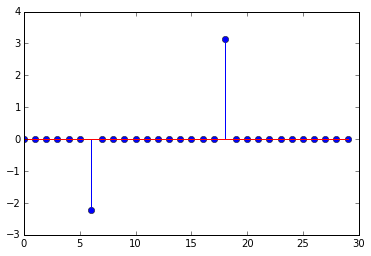

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n         =  30
x         =  np.zeros(n)
x[n*0.2]  = -np.sqrt(5) # 1.73
x[n*0.6]  =  np.pi      # 3.14

N = np.arange(n)
plt.stem(x)
plt.show()

## 2. linear measurement

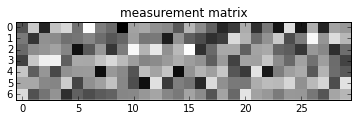

In [14]:
from CSToolbox.generator.random_matrix import gaussian

m  =  n*0.25 # number of measurement (10% of vector length)
A  =  gaussian(m,n)

plt.title('measurement matrix')
plt.imshow(A, cmap='gray', interpolation='none')
plt.show()

As mentioned before, we can not know $s$, we just can get inner products vector $y$ through linear measurement.

In [15]:
y = np.dot(A, x)
print y

[-3.84347131 -1.56094015  1.42087881 -0.0605404   1.08621118  0.07040156
  1.50878317]


## 3. sparse recovery

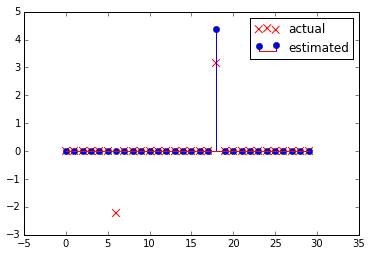

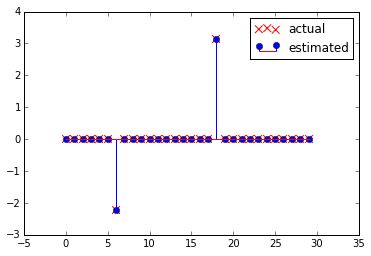

Converged
------- summary ------
[ OMP ]
number of iterations: 2
specified error:   1.00e-05
residual norm (e): 2.36e-16



In [29]:
from CSToolbox.greedy.OMP import OMP

iterator = OMP(A, y)
iterator.set_maxiterations(5)

for z in iterator:
    plt.stem(z.real, label='estimated')
    plt.scatter(N, x, s=60, c='r', marker='x', label='actual')
    plt.legend()
    plt.show()